## Set up MongoDB connection

In [ ]:
#if using google colab, upload data from /data folder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m pip install "pymongo[srv]==3.11"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.7/771.7 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.4/188.4 kB 14.2 MB/s eta 0:00:00
  Created wheel for pymongo: filename=pymongo-3.11.0-cp311-cp311-linux_x86_64.whl size=495604 sha256=1878f6147f833a0c899a946f51b6e4b4c91bc6f854e1b7b2ee235ac8f15a2105
  Stored in directory: /root/.cache/pip/wheels/43/00/27/6d27c275881078538e7cd04e595f2f3a1f14b1ef9e32e40583
Successfully built pymongo


In [ ]:
from pymongo import MongoClient
import os
from dotenv import load_dotenv

load_dotenv() 

uri = os.getenv("MONGO_URI")

client = MongoClient(uri, tls=True)
db = client["umls_concepts_roberta"]

## Load metadata from file/MongoDB

In [ ]:
#load pmc metadata
import pandas as pd
pmc_metadata = pd.read_csv("/data/pubmed_medline_with_tokens_roberta.csv")
pmc_metadata

,PMID,Title,Abstract,MeSH headings,Authors,Journal,Year,Month,Source,Country,Tokens,PMCID
0,38785475,Impact of an Inter-Professional Clinic on Panc...,Background: Pancreatic ductal adenocarcinoma (...,Humans; Retrospective Studies; *Pancreatic Neo...,Moffat GT; Coyne Z; Albaba H; Aung KL; Dodd A;...,"Current oncology (Toronto, Ont.)",2024,May,Curr Oncol. 2024 May 2;31(5):2589-2597. doi: 1...,Switzerland,398,11119140
1,31677259,Do Patients Diagnosed with Metastatic Pancreat...,BACKGROUND With the progress in surgical techn...,Adult; Aged; China; Female; Humans; Kaplan-Mei...,Wang L; Yang L; Chen L; Chen Z,Medical science monitor : international medica...,2019,Nov,Med Sci Monit. 2019 Nov 2;25:8230-8241. doi: 1...,United States,346,6852709
2,30894932,"A Review of Pancreatic Cancer: Epidemiology, G...",Pancreatic cancer ranks among the causes of ca...,NaN,Idachaba S; Dada O; Abimbola O; Olayinka O; Um...,Open access Macedonian journal of medical scie...,2019,Feb,Open Access Maced J Med Sci. 2019 Feb 14;7(4):...,North Macedonia,233,6420955
3,26328610,Integrative analysis of multi-omics data for i...,BACKGROUND: microRNA (miRNA) expression plays ...,"Biomarkers, Tumor/*genetics; *Computational Bi...",Kwon MS; Kim Y; Lee S; Namkung J; Yun T; Yi SG...,BMC genomics,2015,NaN,BMC Genomics. 2015;16 Suppl 9(Suppl 9):S4. doi...,England,262,4547403
4,36358718,Immunomodulatory Effects of Stereotactic Body ...,BACKGROUND: Patients with locally advanced pan...,NaN,van 't Land FR; Lau SP; de Koning W; Klaase L;...,Cancers,2022,Oct,Cancers (Basel). 2022 Oct 27;14(21):5299. doi:...,Switzerland,426,9656492
...,...,...,...,...,...,...,...,...,...,...,...,...
249,24849506,Selected cytokines in patients with pancreatic...,BACKGROUND/AIMS: Recent experimental studies h...,Bone Marrow Cells/cytology; Case-Control Studi...,Blogowski W; Deskur A; Budkowska M; Salata D; ...,PloS one,2014,NaN,PLoS One. 2014 May 21;9(5):e97613. doi: 10.137...,United States,323,4029741
250,37159609,Translation and validation of the Pancreatic C...,OBJECTIVE: We aimed to establish and validate ...,NaN,Cui L; Yu H; Sun Q; Miao Y; Jiang K; Fang X,Asia-Pacific journal of oncology nursing,2023,Apr,Asia Pac J Oncol Nurs. 2023 Feb 17;10(4):10020...,United States,313,10162946
251,35898377,The Role of Type 2 Diabetes in Pancreatic Cancer.,The incidence of type 2 diabetes mellitus (T2D...,NaN,George S; Jean-Baptiste W; Yusuf Ali A; Inyang...,Cureus,2022,Jun,Cureus. 2022 Jun 24;14(6):e26288. doi: 10.7759...,United States,442,9308974
252,37032728,Artificial intelligence as a noninvasive tool ...,Pancreatic cancer (PC) has a low incidence rat...,"Humans; *Carcinoma, Pancreatic Ductal/patholog...",Faur AC; Lazar DC; Ghenciu LA,World journal of gastroenterology,2023,Mar,World J Gastroenterol. 2023 Mar 28;29(12):1811...,United States,517,10080704


In [ ]:
#load reddit metadata
r_metadata = pd.read_csv("/data/reddit_metadata.csv")
r_metadata

,Type,Post_id,Text_snippet,Score,Flair,Total_comments,Tokens,dataset
0,Post,1bom69c,I know this has been asked but I 'm curious ho...,29,"worried, no diagnosis",308,35,Reddit
1,Comment,1bom69c,They say hindsight is 20/20 and in my wife 's ...,16,NaN,0,356,Reddit
2,Comment,1bom69c,My dad had started complaining of a stomach ac...,15,NaN,0,157,Reddit
3,Comment,1bom69c,Had back pain for a month or more before diagn...,12,NaN,0,26,Reddit
4,Comment,1bom69c,I was complaining to my PCP for EIGHTEEN MONTH...,10,NaN,0,27,Reddit
...,...,...,...,...,...,...,...,...
8087,Comment,1idp81z,Perhaps a nerve block ? It 's a procedure wher...,3,NaN,0,43,Reddit
8088,Comment,1idp81z,Darn . I 'm sorry to hear that . Keep letting ...,1,NaN,0,25,Reddit
8089,Comment,1idp81z,I asked about it once before but they said it ...,1,NaN,0,40,Reddit
8090,Comment,1idp81z,Sometimes you have to wonder if the real reaso...,1,NaN,0,39,Reddit


In [ ]:
#sum of tokens in the r_metadata
print(f"A total of {r_metadata['Tokens'].sum()} tokens in {len(r_metadata)} submissions")

#sum of tokens in pmc_metada
print(f"A total of {pmc_metadata['Tokens'].sum()} tokens in {len(pmc_metadata)} submissions")

A total of 592258 tokens in 8092 submissions
A total of 98295 tokens in 254 submissions


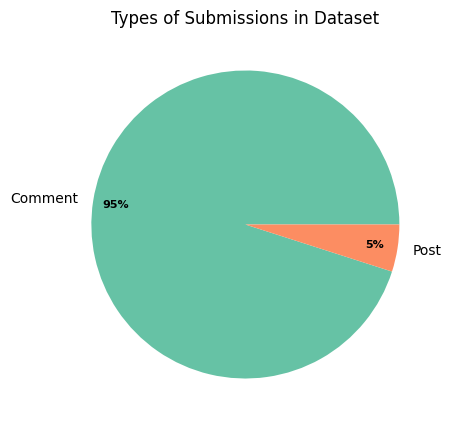

In [ ]:
#preview types % of 'Type' in r_metadata as pie chart
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


submission_type = r_metadata['Type'].value_counts()
submission_type_df = pd.DataFrame({'Type': submission_type.index, 'count': submission_type.values})

colors = sns.color_palette("Set2")
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))

#show percentage
def func(pct, allvals):
    return f"{pct:.0f}%"

#pie chart
wedges, texts, autotexts = ax.pie(submission_type_df['count'], labels=submission_type_df['Type'], autopct=lambda pct: func(pct, submission_type_df['count']),
                                  textprops={'color': "black"}, colors=colors, pctdistance=0.85, labeldistance=1.1)

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Types of Submissions in Dataset")
plt.show()

## Get entity labels from MongoDB (Query) / Local Drive

In [ ]:
import pandas as pd
r_entts_df = pd.read_csv('/data/reddit_entity_mapped_roberta.csv')
r_entts_df

,post_id,entity,label,dataset,cui,preferred_name,rootSource,semantic_types
0,1bom69c,symptoms,PROBLEM,Reddit,C1457887,Symptoms,MTH,Sign or Symptom
1,1bom69c,stomach or digestive problems,PROBLEM,Reddit,NaN,NaN,NaN,NaN
2,1bom69c,pancreatic cancer,PROBLEM,Reddit,C0235974,Pancreatic carcinoma,MTH,Neoplastic Process
3,1bom69c,stomach issues,PROBLEM,Reddit,NaN,NaN,NaN,NaN
4,1bom69c,an antacid,TREATMENT,Reddit,C0003138,Antacids,MTH,Pharmacologic Substance
...,...,...,...,...,...,...,...,...
38399,1idp81z,transmitting pain to the brain,PROBLEM,Reddit,NaN,NaN,NaN,NaN
38400,1idp81z,a specialist,TREATMENT,Reddit,C1611835,Specialist,MTH,Professional or Occupational Group
38401,1idp81z,darn,TEST,Reddit,C0440270,Darning - action,RCD,Health Care Activity
38402,1idp81z,the procedure,TREATMENT,Reddit,C0087111,Therapeutic procedure,MTH,Therapeutic or Preventive Procedure


In [ ]:
import pandas as pd
pmc_entts_df = pd.read_csv('/data/pmc_entity_mapped_roberta.csv')
pmc_entts_df

,article_id,entity,label,dataset,cui,preferred_name,rootSource,semantic_types
0,PMC11119140,appropriate treatment,TREATMENT,PMC,C3640049,Appropriate Treatment,NCI,Clinical Attribute
1,PMC11119140,pdac,PROBLEM,PMC,NaN,NaN,NaN,NaN
2,PMC11119140,complex symptomatology,PROBLEM,PMC,NaN,NaN,NaN,NaN
3,PMC11119140,psychosocial implications,PROBLEM,PMC,NaN,NaN,NaN,NaN
4,PMC11119140,interprofessional supportive care management,TREATMENT,PMC,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
13265,PMC11185363,a survival rate,TREATMENT,PMC,C0038954,Survival Rate,MSH,Quantitative Concept
13266,PMC11185363,this deadly disease,PROBLEM,PMC,NaN,NaN,NaN,NaN
13267,PMC11185363,the analysis,TEST,PMC,C0936012,Analysis,MTH,Research Activity
13268,PMC11185363,cytology of pancreatic juice,TEST,PMC,NaN,NaN,NaN,NaN


In [ ]:
#check number of entities extracted in PMC and Reddit datasets
print(f'Number of PMC entities extracted with BioMed-RoBERTa: {len(pmc_entts_df)}')
print(f'Number of Reddit entities extracted with BioMed-RoBERTa: {len(r_entts_df)}')

Number of PMC entities extracted with BioMed-RoBERTa: 13270
Number of Reddit entities extracted with BioMed-RoBERTa: 38404


In [ ]:
#count the number of entities extracted per label in Reddit dataset vs PMC dataset
label_df = pd.DataFrame(
    {'Reddit': r_entts_df['label'].value_counts(),
     'PMC': pmc_entts_df['label'].value_counts()
    }
)
label_df

,Reddit,PMC
label,,
PROBLEM,21668,6609
TREATMENT,10826,3813
TEST,5910,2848


## Chi-Square Goodness of Fit Test (Entity Labels)

In [ ]:
from scipy.stats import chisquare

In [ ]:
#get pmc entity label counts
from collections import Counter
pmc_entt_label_count = Counter(pmc_entts_df['label'])
pmc_entt_label_count

Counter({'TREATMENT': 3813, 'PROBLEM': 6609, 'TEST': 2848})

In [ ]:
#get reddit entity label counts
from collections import Counter
r_entt_label_count = Counter(r_entts_df['label'])
r_entt_label_count


Counter({'PROBLEM': 21668, 'TREATMENT': 10826, 'TEST': 5910})

In [ ]:
#chi-square on pmc entity labels
obs_pmc_entts = list(pmc_entt_label_count.values())
obs_r_entts = list(r_entt_label_count.values())

entity_labels = list(pmc_entt_label_count.keys())
#no need to create label again for reddit since both have the same labels

chi2_stat_p, p_pmc = chisquare(f_obs=obs_pmc_entts)
chi2_stat_r, p_reddit = chisquare(f_obs=obs_r_entts)

def interpret_p_value(p_value):
  if p_value < 0.05:
    return("Reject null hypothesis")
  else:
    return("Do not reject null hypothesis")

print(f"Chi-square of pmc = {chi2_stat_p}, p-value = {p_pmc}, {interpret_p_value(p_pmc)}")
print(f"Chi-square of reddit = {chi2_stat_r}, p-value = {p_reddit}, {interpret_p_value(p_reddit)}")

Chi-square of pmc = 1725.2420497362473, p-value = 0.0, Reject null hypothesis
Chi-square of reddit = 10155.988542860117, p-value = 0.0, Reject null hypothesis


p < 0.05 reject null hypothesis

Distribution of feature(label) across dataset is not equal

## Chi-Square Test of Homogeneity (Semantic types)
Test for distribution across two different populations

Null hypothesis = populations are homogeneous (have identical distributions)


In [ ]:
#Count number of semantic types from extracted, mapped entities - Reddit
obs_r_semantics = list(reddit_semantic_types_count.values)
print(f"Number of in unique semantic types found in Reddit: {len(obs_r_semantics)}")

Number of in unique semantic types found in Reddit: 129


In [ ]:
#create contingency table
cont_table = pd.DataFrame({
    'pmc': pmc_entt_label_count,
    'reddit': r_entt_label_count
    }).fillna(0) # fill NaN values with 0 for semantic types that exist in one dataset but not the other

cont_table

,pmc,reddit
TREATMENT,3813,10826
PROBLEM,6609,21668
TEST,2848,5910


In [ ]:
from scipy.stats import chi2_contingency
chi2_homo, p_homo, dof, expected_freq = chi2_contingency(cont_table)

print(f"Chi-square of homogeneity = {chi2_homo}")
print(f"p-value = {p_homo}, {interpret_p_value(p_homo)}")
print(f"degrees of freedom = {dof}")

Chi-square of homogeneity = 294.54911817983185
p-value = 1.0951450953980666e-64, Reject null hypothesis
degrees of freedom = 2


p < 0.05 reject null hypothesis

The two data sources are not homogenous

## Descriptive Analysis

## Merge dataframes

In [ ]:


pmc_entts = pmc_entts_df.rename(columns={'post_id': 'id'})
r_entts = r_entts_df.rename(columns={'article_id': 'id'})


In [ ]:
#rename columns 'post_id' and 'article_id' to 'id' in pmc_entts_df and r_entts_df
pmc_entts = pmc_entts_df.rename(columns={'article_id': 'id'})
r_entts = r_entts_df.rename(columns={'post_id': 'id'})

#colate into one dataframe and export to csv
symp_entts_df = pd.concat([pmc_entts, r_entts], ignore_index=True)
symp_entts_df.to_csv('/data/symp_entts_df.csv', index=False)
symp_entts_df


,id,entity,label,dataset,cui,preferred_name,rootSource,semantic_types
0,PMC11119140,appropriate treatment,TREATMENT,PMC,C3640049,Appropriate Treatment,NCI,Clinical Attribute
1,PMC11119140,pdac,PROBLEM,PMC,NaN,NaN,NaN,NaN
2,PMC11119140,complex symptomatology,PROBLEM,PMC,NaN,NaN,NaN,NaN
3,PMC11119140,psychosocial implications,PROBLEM,PMC,NaN,NaN,NaN,NaN
4,PMC11119140,interprofessional supportive care management,TREATMENT,PMC,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
51669,1idp81z,transmitting pain to the brain,PROBLEM,Reddit,NaN,NaN,NaN,NaN
51670,1idp81z,a specialist,TREATMENT,Reddit,C1611835,Specialist,MTH,Professional or Occupational Group
51671,1idp81z,darn,TEST,Reddit,C0440270,Darning - action,RCD,Health Care Activity
51672,1idp81z,the procedure,TREATMENT,Reddit,C0087111,Therapeutic procedure,MTH,Therapeutic or Preventive Procedure


In [108]:
#drop rows if there is na in column ['cui']
symp_entts = symp_entts_df.dropna(subset=['cui'])
symp_entts

,id,entity,label,dataset,cui,preferred_name,rootSource,semantic_types
0,PMC11119140,appropriate treatment,TREATMENT,PMC,C3640049,Appropriate Treatment,NCI,Clinical Attribute
7,PMC11119140,an approach,TREATMENT,PMC,C0175672,Transvaginal approach,MTH,Spatial Concept
8,PMC11119140,pancreatic cancer,PROBLEM,PMC,C0235974,Pancreatic carcinoma,MTH,Neoplastic Process
11,PMC11119140,standard therapies,TREATMENT,PMC,C2936643,Standard of Care,MSH,Health Care Activity
12,PMC11119140,surgery,TREATMENT,PMC,C0038894,Surgery specialty,MTH,Biomedical Occupation or Discipline
...,...,...,...,...,...,...,...,...
51667,1idp81z,a nerve block,PROBLEM,Reddit,C0027741,Nerve Block,MSH,Therapeutic or Preventive Procedure
51668,1idp81z,a procedure,TREATMENT,Reddit,C1546467,Act Class - procedure,MTH,Occupational Activity
51670,1idp81z,a specialist,TREATMENT,Reddit,C1611835,Specialist,MTH,Professional or Occupational Group
51671,1idp81z,darn,TEST,Reddit,C0440270,Darning - action,RCD,Health Care Activity


### Count Semantic types

In [ ]:
pmc_semantic_types_count = pmc_entts_df.value_counts('semantic_types')

In [ ]:
pmc_entts_df.value_counts('semantic_types')

,count
semantic_types,
Neoplastic Process,1467
Therapeutic or Preventive Procedure,948
Finding,743
Disease or Syndrome,450
Gene or Genome,368
...,...
Mammal,1
"Manufactured Object, Intellectual Product",1
"Organic Chemical, Pharmacologic Substance, Hormone",1


In [ ]:
reddit_semantic_types_count = r_entts_df.value_counts('semantic_types')
reddit_semantic_types_count

,count
semantic_types,
Finding,3198
Sign or Symptom,2478
Intellectual Product,1848
Diagnostic Procedure,1762
Neoplastic Process,1606
...,...
"Manufactured Object, Intellectual Product",2
"Nucleic Acid, Nucleoside, or Nucleotide, Biologically Active Substance",2
Organization,2


In [ ]:
#Count number of semantic types from extracted, mapped entities -PMC
obs_pmc_semantics = list(pmc_semantic_types_count.values)
print(f"Number of in unique semantic types found in PMC: {len(obs_pmc_semantics)}")

Number of in unique semantic types found in PMC: 126


## Check quality of entities extraced by BioMed-RoBERTA
- Count no. of stopwords as entities
- Analyse qualitatively


In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
#extract single-token stopwords
def is_single_stopword(text): #and punctuation!
  if isinstance(text, str):
    doc = nlp(text.strip())
    return len(doc) == 1 and (doc[0].is_stop or doc[0].is_punct)
  return False

In [ ]:
r_entts_filtered = r_entts_df[r_entts_df['entity'].apply(is_single_stopword)]

In [ ]:
pmc_entts_filtered = pmc_entts_df[pmc_entts_df['entity'].apply(is_single_stopword)]

In [ ]:
print(f"Out of {len(r_entts_df['entity'].value_counts())} unique entites identified in the Reddit dataset, {len(pmc_entts_filtered)} are stopwords")
print(f"Out of {len(pmc_entts_df['entity'].value_counts())} unique entites identified in the PMC dataset, {len(r_entts_filtered)} are stopwords")

Out of 9023 unique entites identified in the Reddit dataset, 101 are stopwords
Out of 6991 unique entites identified in the PMC dataset, 918 are stopwords


## UMLS Mapping performance

In [ ]:
#check how many entities successfully mapped using UMLSClient API (notna)
print(f"Number of PMC entities normalized to UMLS: {pmc_entts_df['cui'].notna().sum()}")
print(f"Number of Reddit entities normalized to UMLS: {r_entts_df['cui'].notna().sum()}")

Number of PMC entities normalized to UMLS: 8353
Number of Reddit entities normalized to UMLS: 23894


In [ ]:
#Count number of semantic types from extracted, mapped entities -PMC & reddit
observed_pmc_semantics = list(pmc_semantic_types_count.values)
observed_reddit_semantics = list(reddit_semantic_types_count.values)
print(f"Number of in unique semantic types found in Reddit: {len(observed_reddit_semantics)}")
print(f"Number of in unique semantic types found in PMC: {len(observed_pmc_semantics)}")

Number of in unique semantic types found in Reddit: 129
Number of in unique semantic types found in PMC: 126


In [ ]:
pmc_entts_df.value_counts('semantic_types')

,count
semantic_types,
Neoplastic Process,1467
Therapeutic or Preventive Procedure,948
Finding,743
Disease or Syndrome,450
Gene or Genome,368
...,...
Mammal,1
"Manufactured Object, Intellectual Product",1
"Organic Chemical, Pharmacologic Substance, Hormone",1


In [ ]:
#show only rows with sepcific semantic type
pmc_entts_df[pmc_entts_df['semantic_types'] == 'Disease or Syndrome']

,article_id,entity,label,dataset,cui,preferred_name,rootSource,semantic_types
167,PMC9656492,immune activation,PROBLEM,PMC,C4049273,Systemic immune activation,MDR,Disease or Syndrome
169,PMC9656492,immune activation,PROBLEM,PMC,C4049273,Systemic immune activation,MDR,Disease or Syndrome
215,PMC9656492,enhanced t cell activation,PROBLEM,PMC,C4551967,B-CELL EXPANSION WITH NFKB AND T-CELL ANERGY,MTH,Disease or Syndrome
295,PMC7731834,lynch syndrome,PROBLEM,PMC,C4552100,Lynch Syndrome,MTH,Disease or Syndrome
343,PMC6212542,obstructive jaundice,PROBLEM,PMC,C0022354,"Jaundice, Obstructive",MTH,Disease or Syndrome
...,...,...,...,...,...,...,...,...
13149,PMC9308974,obesity,PROBLEM,PMC,C0028754,Obesity,MTH,Disease or Syndrome
13167,PMC10080704,the disease,PROBLEM,PMC,C0012634,Disease,MTH,Disease or Syndrome
13184,PMC10080704,ai,TEST,PMC,C0003504,Aortic Valve Insufficiency,MTH,Disease or Syndrome
13193,PMC10080704,early lesions,PROBLEM,PMC,C0343828,Early yaws skin lesion,SNOMEDCT_US,Disease or Syndrome


In [ ]:
#show the top 10 rows of columns after dropping where 'cui' is na
pmc_entts_df.dropna(subset=['cui']).head(10)

,article_id,entity,label,dataset,cui,preferred_name,rootSource,semantic_types
0,PMC11119140,appropriate treatment,TREATMENT,PMC,C3640049,Appropriate Treatment,NCI,Clinical Attribute
7,PMC11119140,an approach,TREATMENT,PMC,C0175672,Transvaginal approach,MTH,Spatial Concept
8,PMC11119140,pancreatic cancer,PROBLEM,PMC,C0235974,Pancreatic carcinoma,MTH,Neoplastic Process
11,PMC11119140,standard therapies,TREATMENT,PMC,C2936643,Standard of Care,MSH,Health Care Activity
12,PMC11119140,surgery,TREATMENT,PMC,C0038894,Surgery specialty,MTH,Biomedical Occupation or Discipline
13,PMC11119140,chemotherapy,TREATMENT,PMC,C3665472,Chemotherapy,MTH,Therapeutic or Preventive Procedure
14,PMC11119140,radiation therapy,TREATMENT,PMC,C1522449,Radiation therapy (procedure),MTH,Therapeutic or Preventive Procedure
15,PMC11119140,survival,TEST,PMC,C0220921,survival aspects,MTH,Functional Concept
16,PMC11119140,disease stage,PROBLEM,PMC,C0699749,disease stage,MTH,Clinical Attribute
17,PMC11119140,treatment,TREATMENT,PMC,C1522326,Treating,MTH,Functional Concept


In [ ]:
pmc_temp_df = pmc_entts_df[pmc_entts_df['semantic_types'].isin(['Finding', 'Sign or Symptom'])]
pmc_temp_df.value_counts('label')

#change counts results to percentages
print('% Distribution of labels in "Finding" and "Sign or Symptom" in PMC:')
for label, count in pmc_temp_df.value_counts('label').items():
    percentage = (count / len(pmc_temp_df)) * 100
    print(f"{label}: {percentage:.2f}%")

% Distribution of labels in "Finding" and "Sign or Symptom" in PMC:
PROBLEM: 74.89%
TREATMENT: 14.04%
TEST: 11.07%


In [ ]:
r_temp_df = r_entts_df[r_entts_df['semantic_types'].isin(['Finding', 'Sign or Symptom'])]
r_temp_df.value_counts('label')

#change counts results to percentages
print('% Distribution of labels in "Finding" and "Sign or Symptom" in Reddit:')
for label, count in r_temp_df.value_counts('label').items():
    percentage = (count / len(r_temp_df)) * 100
    print(f"{label}: {percentage:.2f}%")

% Distribution of labels in "Finding" and "Sign or Symptom" in Reddit:
PROBLEM: 87.88%
TREATMENT: 6.98%
TEST: 5.14%


In [ ]:
pmc_temp_df2 = pmc_entts_df[pmc_entts_df['label'].isin(['PROBLEM'])]
pmc_temp_df2.value_counts('semantic_types').head(10)

,count
semantic_types,
Neoplastic Process,1462
Finding,470
Disease or Syndrome,430
Sign or Symptom,362
Pathologic Function,189
Gene or Genome,188
Intellectual Product,108
Cell,107
Therapeutic or Preventive Procedure,81


In [88]:
r_temp_df2 = pmc_entts_df[r_entts_df['label'].isin(['PROBLEM'])]
r_temp_df2.value_counts('semantic_types').head(10)

/tmp/ipython-input-3249913251.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  r_temp_df2 = pmc_entts_df[r_entts_df['label'].isin(['PROBLEM'])]


,count
semantic_types,
Neoplastic Process,855
Therapeutic or Preventive Procedure,557
Finding,439
Disease or Syndrome,269
Gene or Genome,228
Sign or Symptom,221
Health Care Activity,202
Intellectual Product,185
Diagnostic Procedure,183


In [ ]:
#display the top 10 rows with the label 'PROBLEM' where when filtered by 'Findings' or 'Sign or Syndrome'.
pmc_entts_df[(pmc_entts_df['label'] == 'PROBLEM') & (pmc_entts_df['semantic_types'].isin(['Finding', 'Sign or Symptom']))]

,article_id,entity,label,dataset,cui,preferred_name,rootSource,semantic_types
18,PMC11119140,symptoms,PROBLEM,PMC,C1457887,Symptoms,MTH,Sign or Symptom
30,PMC11119140,symptom,PROBLEM,PMC,C1457887,Symptoms,MTH,Sign or Symptom
203,PMC9656492,increased levels,PROBLEM,PMC,C5775494,Increased ammonia levels,OMIM,Finding
300,PMC7731834,psychological symptoms,PROBLEM,PMC,C0233397,Psychological symptom,SNOMEDCT_US,Sign or Symptom
318,PMC7731834,psychological symptoms,PROBLEM,PMC,C0233397,Psychological symptom,SNOMEDCT_US,Sign or Symptom
...,...,...,...,...,...,...,...,...
13182,PMC10080704,pancreatic lesions,PROBLEM,PMC,C5856176,Pancreatic Cystic Lesion,NCI,Finding
13202,PMC10080704,subtle changes,PROBLEM,PMC,C4015148,Subtle foveal changes,OMIM,Finding
13203,PMC10080704,pancreatic lesions,PROBLEM,PMC,C5856176,Pancreatic Cystic Lesion,NCI,Finding
13204,PMC10080704,pancreatic neoplasia,PROBLEM,PMC,C4315004,Pancreatic endocrine neoplasia,OMIM,Finding


In [99]:
pmc_sym_df = pmc_entts_df[(pmc_entts_df['label'] == 'PROBLEM') & (pmc_entts_df['semantic_types'].isin(['Finding', 'Sign or Symptom']))]
pmc_sym_df

,article_id,entity,label,dataset,cui,preferred_name,rootSource,semantic_types
18,PMC11119140,symptoms,PROBLEM,PMC,C1457887,Symptoms,MTH,Sign or Symptom
30,PMC11119140,symptom,PROBLEM,PMC,C1457887,Symptoms,MTH,Sign or Symptom
203,PMC9656492,increased levels,PROBLEM,PMC,C5775494,Increased ammonia levels,OMIM,Finding
300,PMC7731834,psychological symptoms,PROBLEM,PMC,C0233397,Psychological symptom,SNOMEDCT_US,Sign or Symptom
318,PMC7731834,psychological symptoms,PROBLEM,PMC,C0233397,Psychological symptom,SNOMEDCT_US,Sign or Symptom
...,...,...,...,...,...,...,...,...
13182,PMC10080704,pancreatic lesions,PROBLEM,PMC,C5856176,Pancreatic Cystic Lesion,NCI,Finding
13202,PMC10080704,subtle changes,PROBLEM,PMC,C4015148,Subtle foveal changes,OMIM,Finding
13203,PMC10080704,pancreatic lesions,PROBLEM,PMC,C5856176,Pancreatic Cystic Lesion,NCI,Finding
13204,PMC10080704,pancreatic neoplasia,PROBLEM,PMC,C4315004,Pancreatic endocrine neoplasia,OMIM,Finding


In [100]:
pmc_sym_df.value_counts('preferred_name').head(6)

,count
preferred_name,
Symptoms,107
Pain,44
Fatigue,30
Death (finding),25
Weight Loss,23
risk factors,19


In [101]:
r_sym_df = r_entts_df[(r_entts_df['label'] == 'PROBLEM') & (r_entts_df['semantic_types'].isin(['Finding', 'Sign or Symptom']))]
r_sym_df.value_counts('preferred_name').head(10)

,count
preferred_name,
Symptoms,480
Chest Pain,224
Nausea,168
jaundice,144
Back Pain,114
Weight Loss,108
Vomiting,102
Fatigue,98
Diarrhea,92


### What is lost in translation

In [ ]:
#entity to preffered_name
pmc_translate = pd.DataFrame({
    'data_source': 'PMC',
    'raw_entity': pmc_sym_df['entity'],
    'mapped_entity': pmc_sym_df['preferred_name']
})

r_translate = pd.DataFrame({
    'data_source': 'Reddit',
    'raw_entity': r_sym_df['entity'],
    'mapped_entity': r_sym_df['preferred_name']
})

#colate both dataframes into one
entt_translate_df = pd.concat([pmc_translate, r_translate], ignore_index=True)
entt_translate_df.to_csv('/data/entity_translate.csv', index=False)
entt_translate_df

,data_source,raw_entity,mapped_entity
0,PMC,symptoms,Symptoms
1,PMC,symptom,Symptoms
2,PMC,increased levels,Increased ammonia levels
3,PMC,psychological symptoms,Psychological symptom
4,PMC,psychological symptoms,Psychological symptom
...,...,...,...
5815,Reddit,difficulty swallowing food,Difficulty swallowing food
5816,Reddit,abdominal pain,Abdominal Pain
5817,Reddit,jaundice,jaundice
5818,Reddit,symptoms,Symptoms


In [152]:
entity_count = entt_translate_df.groupby("mapped_entity")["raw_entity"].nunique().reset_index(name="num_of_raw_entity")
sorted_entity_count = entity_count.sort_values(by='num_of_raw_entity', ascending=False)
sorted_entity_count

,mapped_entity,num_of_raw_entity
228,Fatigue,6
708,Stomach ache,5
810,Vomiting,5
545,Pain,5
725,Symptoms,5
...,...,...
362,Increasing breathlessness,1
363,Index assessment during the denominator period...,1
364,Infected,1
365,Inflammatory oedema reaction,1


In [148]:
mapped_term = "jaundice"
raws = entt_translate_df[entt_translate_df["mapped_entity"] == mapped_term]["raw_entity"].unique()

print(f"Raw entities mapped to '{mapped_term}':\n")
for i, term in enumerate(raws, 1):
    print(f"{i}. {term}")


Raw entities mapped to 'jaundice':

1. jaundice
2. the jaundice


In [166]:
#get top 10
top_10 = []
for term in sorted_entity_count['mapped_entity'][:10]:
  top_10.append(term)

top_10

['Fatigue',
 'Stomach ache',
 'Vomiting',
 'Pain',
 'Symptoms',
 'Upset stomach',
 'Weight Loss',
 'Pruritus',
 'Diarrhea',
 'Low grade fever']

In [167]:
#find all raw entities mapped to top 10
for mapped_term in top_10:
    print(f"\n=== Mapped Entity: '{mapped_term}' ===")

    sub_df = entt_translate_df[entt_translate_df["mapped_entity"] == mapped_term]

    #group by dataset
    for source, group in sub_df.groupby("data_source"):
        unique_raws = group["raw_entity"].unique()

        print(f"\nFrom '{source}' ({len(unique_raws)} unique raw entities):")
        for i, raw_term in enumerate(unique_raws, 1):
            print(f"  {i}. {raw_term}")


=== Mapped Entity: 'Fatigue' ===

From 'PMC' (2 unique raw entities):
  1. fatigue
  2. tiredness

From 'Reddit' (6 unique raw entities):
  1. fatigue
  2. extreme fatigue
  3. fatigued
  4. the fatigue
  5. tiredness
  6. extremely fatigued

=== Mapped Entity: 'Stomach ache' ===

From 'Reddit' (5 unique raw entities):
  1. a stomach ache
  2. the stomach ach
  3. stomach pain
  4. gastric pain
  5. pain in the stomach

=== Mapped Entity: 'Vomiting' ===

From 'PMC' (1 unique raw entities):
  1. vomiting

From 'Reddit' (5 unique raw entities):
  1. vomiting
  2. vomited
  3. the vomiting
  4. vomitting
  5. throwing up

=== Mapped Entity: 'Pain' ===

From 'PMC' (2 unique raw entities):
  1. pain
  2. pain symptoms

From 'Reddit' (3 unique raw entities):
  1. painful
  2. pains
  3. a pain

=== Mapped Entity: 'Symptoms' ===

From 'PMC' (4 unique raw entities):
  1. symptoms
  2. symptom
  3. the symptoms
  4. the symptom

From 'Reddit' (5 unique raw entities):
  1. symptoms
  2. the sym

## Most common symptoms vs extracted entities

Health institution's most common terms related to pancreatic cancer versus how commonly it was extracted from data sources

### Map common symptom terms first

In [ ]:
#download umls python package
!pip install umls-python-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 12.0 MB/s eta 0:00:00


In [ ]:
import logging
import os
import sys
from dotenv import load_dotenv
load_dotenv() 

from umls_python_client import UMLSClient

# Configure logging
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s", force=True
)
logger = logging.getLogger()

# Add your API key
API_KEY = os.getenv('UMLS_API')


In [ ]:
search_api = UMLSClient(api_key=API_KEY).searchAPI

2025-08-07 21:11:08,694 - INFO - UMLSClient initialized with SearchAPI, SourceAPI, CUIAPI, semanticNetworkAPI and crosswalkAPI


In [ ]:
cui_api = UMLSClient(api_key=API_KEY).cuiAPI

2025-08-07 21:11:10,197 - INFO - UMLSClient initialized with SearchAPI, SourceAPI, CUIAPI, semanticNetworkAPI and crosswalkAPI


In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#function for UMLS mapping
import re
import json
import difflib
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_semantic_types_for_cui(cui):
  cui_info = cui_api.get_cui_info(cui=cui, save_to_file=False)
  result = cui_info if isinstance(cui_info, dict) else json.loads(cui_info)
  semantic_types = result.get("result", {}).get("semanticTypes", [])
  return [st.get("name") for st in semantic_types]

def umls_mapping(entity):
  search_result = search_api.search(
      search_string=entity,
      partial_search=True,
      input_type=None,
      include_obsolete=False,
      include_suppressible=False,
      return_id_type="concept",
      search_type="words",
      page_number=1,
      page_size=5,
      save_to_file=False
  )

  result = search_result if isinstance(search_result, dict) else json.loads(search_result)
  results = result.get("result", {}).get("results", [])

  if not results:
      print(f"[FALLBACK] Retrying with 'words' search for: '{entity}'")
      search_result = search_api.search(
          search_string=entity_clean,
          input_type=None,
          include_obsolete=False,
          include_suppressible=False,
          return_id_type="concept",
          search_type="words",
          page_number=1,
          page_size=5,
          save_to_file=False
      )
      result = search_result if isinstance(search_result, dict) else json.loads(search_result)
      results = result.get("result", {}).get("results", [])

  if not results:
      print(f"[NO MATCH] No UMLS concept for: '{entity}'")
      return None

  best = max(
      results,
      key=lambda r: difflib.SequenceMatcher(None, entity, r.get("name", "").lower()).ratio(),
      default=None
  )

  similarity = difflib.SequenceMatcher(None, entity, best.get("name", "").lower()).ratio()

  if similarity < 0.1:
      print(f"[REJECTED] '{entity}' → '{best.get('name')}' (Sim: {similarity:.2f})")
      return None

  cui = best.get("ui")
  semantic_types = get_semantic_types_for_cui(cui)

  doc = {
      "entity": entity,
      "ui": best.get("ui"),
      "name": best.get("name"),
      "rootSource": best.get("rootSource"),
      "semantic_types": semantic_types
  }
  return doc

In [ ]:
common_terms = ['jaundice', 'light coloured stools', 'dark urine', 'pain in the upper abdomen and back', 'pain in middle abdomen and back', 'unintentional weight loss', 'loss of appetite', 'fatigue']
results = []

for term in common_terms:
  result = umls_mapping(term)
  if result:
    results.append(result)

print(results)

2025-08-07 21:11:24,425 - INFO - Searching UMLS with parameters: {'string': 'jaundice', 'includeObsolete': 'false', 'includeSuppressible': 'false', 'returnIdType': 'concept', 'searchType': 'words', 'partialSearch': 'true', 'pageNumber': 1, 'pageSize': 5, 'apiKey': 'ca8695ed-5427-4628-968e-27aef4dac5f3'}
2025-08-07 21:11:24,977 - INFO - Fetching CUI concept: C2010848
2025-08-07 21:11:24,982 - INFO - Searching UMLS with parameters: {'string': 'light coloured stools', 'includeObsolete': 'false', 'includeSuppressible': 'false', 'returnIdType': 'concept', 'searchType': 'words', 'partialSearch': 'true', 'pageNumber': 1, 'pageSize': 5, 'apiKey': 'ca8695ed-5427-4628-968e-27aef4dac5f3'}
2025-08-07 21:11:25,523 - INFO - Fetching CUI concept: C1142361
2025-08-07 21:11:25,526 - INFO - Searching UMLS with parameters: {'string': 'dark urine', 'includeObsolete': 'false', 'includeSuppressible': 'false', 'returnIdType': 'concept', 'searchType': 'words', 'partialSearch': 'true', 'pageNumber': 1, 'pageSi

[{'entity': 'jaundice', 'ui': 'C2010848', 'name': 'jaundice', 'rootSource': 'MTH', 'semantic_types': ['Finding']}, {'entity': 'light coloured stools', 'ui': 'C1142361', 'name': 'Red coloured stools', 'rootSource': 'MDR', 'semantic_types': ['Finding']}, {'entity': 'dark urine', 'ui': 'C4304293', 'name': 'Dark yellow urine', 'rootSource': 'SNOMEDCT_US', 'semantic_types': ['Finding']}, {'entity': 'pain in the upper abdomen and back', 'ui': 'C4230322', 'name': 'Pain in the upper and lower limbs', 'rootSource': 'OMIM', 'semantic_types': ['Finding']}, {'entity': 'pain in middle abdomen and back', 'ui': 'C1960988', 'name': 'Pain radiating to middle abdomen', 'rootSource': 'SNOMEDCT_US', 'semantic_types': ['Sign or Symptom']}, {'entity': 'unintentional weight loss', 'ui': 'C2363736', 'name': 'Unintentional weight loss', 'rootSource': 'SNOMEDCT_US', 'semantic_types': ['Finding']}, {'entity': 'loss of appetite', 'ui': 'C3814874', 'name': 'Loss of Appetite question', 'rootSource': 'MTH', 'semanti

In [ ]:
import pandas as pd
common_terms_mapped_df = pd.DataFrame(results)

In [ ]:
common_terms_mapped_df
common_terms_mapped_df.to_csv('/data/common_terms_mapped.csv', index=False)

In [ ]:
#import back in common terms
common_terms_mapped_df = pd.read_csv('/data/common_terms_mapped.csv')
common_terms_mapped_df

,entity,ui,name,rootSource,semantic_types
0,jaundice,C2010848,jaundice,MTH,['Finding']
1,light coloured stools,C1142361,Red coloured stools,MDR,['Finding']
2,dark urine,C4304293,Dark yellow urine,SNOMEDCT_US,['Finding']
3,pain in the upper abdomen and back,C4230322,Pain in the upper and lower limbs,OMIM,['Finding']
4,pain in middle abdomen and back,C1960988,Pain radiating to middle abdomen,SNOMEDCT_US,['Sign or Symptom']
5,unintentional weight loss,C2363736,Unintentional weight loss,SNOMEDCT_US,['Finding']
6,loss of appetite,C3814874,Loss of Appetite question,MTH,['Intellectual Product']
7,fatigue,C0015672,Fatigue,MTH,['Sign or Symptom']


#### Overall ranking - no filter

In [175]:
#PMC
#count unique entities by name
from collections import Counter
unique_pmc_entities = Counter(pmc_entts_df['preferred_name'])
unique_pmc_entities

Counter({'Appropriate Treatment': 5,
         nan: 4917,
         'Transvaginal approach': 1,
         'Pancreatic carcinoma': 954,
         'Standard of Care': 11,
         'Surgery specialty': 65,
         'Chemotherapy': 99,
         'Radiation therapy (procedure)': 8,
         'survival aspects': 6,
         'disease stage': 3,
         'Treating': 106,
         'Symptoms': 108,
         'Multivariate Analysis': 10,
         'Electrocorticogram': 1,
         'Biopsy': 5,
         'assessment.initial': 1,
         'Pathological Diagnosis': 1,
         'Symptom Management': 11,
         'diagnostic service sources renal lab (biopsies)': 1,
         'Malignant Bowel Obstruction, Best Supportive Care Palliative Team Management': 5,
         'Surgical Closure Techniques': 1,
         'Disease Management': 29,
         'Complication': 11,
         'Pancreatic resection': 8,
         'nerve conduction study anomalous innervation screen anomalous innervation present': 4,
         'Initial 

In [ ]:
#Reddit
from collections import Counter

unique_r_entities = Counter(r_entts_df['preferred_name'])
unique_r_entities

Counter({'Symptoms': 480,
         nan: 14510,
         'Pancreatic carcinoma': 638,
         'Antacids': 6,
         'Papaya Enzyme Tablets': 2,
         'her water broke post-term': 36,
         'Gluten-Free Diet': 6,
         'Do or did his or her relative have this eye problem': 2,
         'yellow lower extremities': 2,
         'jaundice': 144,
         'Shock': 26,
         'Hematologic Tests': 56,
         'Roentgen Rays': 18,
         'Urological ultrasound': 66,
         'Cranial CT scan': 132,
         'Biopsy': 224,
         'Stent, device': 24,
         'Takotsubo Cardiomyopathy': 6,
         'Loose': 2,
         'Stomach ache': 34,
         'Lymph Node Involvement': 4,
         'Excessive belching': 2,
         'constant belching': 4,
         'Abdominal bloating': 40,
         'Prune Belly Syndrome': 2,
         'Back Pain': 114,
         'Abdominal Pain': 38,
         'anesthesia for upper endoscopy': 6,
         'Molecular Mass': 38,
         'ultrasound device': 30,
 

In [ ]:
#create get ranking function
def get_rank(term, ranked_list):
    for idx, (entity, _) in enumerate(ranked_list, start=1):
        if entity == term:
            return idx
    return('Not ranked')

In [176]:
#test
pmc_ranked_entities = unique_pmc_entities.most_common()
reddit_ranked_entities = unique_r_entities.most_common()

rank1 = get_rank("jaundice", pmc_ranked_entities)
rank2 = get_rank("jaundice", reddit_ranked_entities)

print(f"Rank of 'jaundice' entity in PMC: {rank1} out of {len(unique_pmc_entities)} entities")
print(f"Rank of 'jaundice' entity in Reddit: {rank2} out of {len(unique_r_entities)} entities")

Rank of 'jaundice' entity in PMC: 50 out of 2922 entities
Rank of 'jaundice' entity in Reddit: 14 out of 3975 entities


In [177]:
common_term_list = list(common_terms_mapped_df['name'])

for term in common_term_list:
  rank1 = get_rank(term, pmc_ranked_entities)
  rank2 = get_rank(term, reddit_ranked_entities)
  print(f"Entity: {term}")
  print(f"PMC: {rank1} out of {len(unique_pmc_entities)} entities")
  print(f"Reddit: {rank2} out of {len(unique_r_entities)} entities \n")

Entity: jaundice
PMC: 50 out of 2922 entities
Reddit: 14 out of 3975 entities 

Entity: Red coloured stools
PMC: Not ranked out of 2922 entities
Reddit: Not ranked out of 3975 entities 

Entity: Dark yellow urine
PMC: Not ranked out of 2922 entities
Reddit: Not ranked out of 3975 entities 

Entity: Pain in the upper and lower limbs
PMC: Not ranked out of 2922 entities
Reddit: Not ranked out of 3975 entities 

Entity: Pain radiating to middle abdomen
PMC: Not ranked out of 2922 entities
Reddit: Not ranked out of 3975 entities 

Entity: Unintentional weight loss
PMC: Not ranked out of 2922 entities
Reddit: 3481 out of 3975 entities 

Entity: Loss of Appetite
PMC: Not ranked out of 2922 entities
Reddit: Not ranked out of 3975 entities 

Entity: Fatigue
PMC: 22 out of 2922 entities
Reddit: 26 out of 3975 entities 



#### Ranking within filter

In [168]:
pmc_sym_df

,article_id,entity,label,dataset,cui,preferred_name,rootSource,semantic_types
18,PMC11119140,symptoms,PROBLEM,PMC,C1457887,Symptoms,MTH,Sign or Symptom
30,PMC11119140,symptom,PROBLEM,PMC,C1457887,Symptoms,MTH,Sign or Symptom
203,PMC9656492,increased levels,PROBLEM,PMC,C5775494,Increased ammonia levels,OMIM,Finding
300,PMC7731834,psychological symptoms,PROBLEM,PMC,C0233397,Psychological symptom,SNOMEDCT_US,Sign or Symptom
318,PMC7731834,psychological symptoms,PROBLEM,PMC,C0233397,Psychological symptom,SNOMEDCT_US,Sign or Symptom
...,...,...,...,...,...,...,...,...
13182,PMC10080704,pancreatic lesions,PROBLEM,PMC,C5856176,Pancreatic Cystic Lesion,NCI,Finding
13202,PMC10080704,subtle changes,PROBLEM,PMC,C4015148,Subtle foveal changes,OMIM,Finding
13203,PMC10080704,pancreatic lesions,PROBLEM,PMC,C5856176,Pancreatic Cystic Lesion,NCI,Finding
13204,PMC10080704,pancreatic neoplasia,PROBLEM,PMC,C4315004,Pancreatic endocrine neoplasia,OMIM,Finding


In [172]:
#Reddit
from collections import Counter

#unique_r_entts = Counter(r_entts_df['preferred_name'])
#unique_pmc_entts = Counter(pmc_entts_df['preferred_name']) #change to the sym_df dataset

pmc_ranked_entts = Counter(pmc_sym_df['preferred_name']).most_common()
r_ranked_entts = Counter(r_sym_df['preferred_name']).most_common()
#reddit_ranked_entt = unique_r_entts.most_common()

In [173]:
common_term_list = list(common_terms_mapped_df['name'])

for term in common_term_list:
  rank1 = get_rank(term, pmc_ranked_entts)
  rank2 = get_rank(term, r_ranked_entts)
  print(f"Entity: {term}")
  print(f"PMC: {rank1} out of {len(pmc_ranked_entts)} entities")
  print(f"Reddit: {rank2} out of {len(r_ranked_entts)} entities \n")

Entity: jaundice
PMC: 7 out of 303 entities
Reddit: 4 out of 763 entities 

Entity: Red coloured stools
PMC: Not ranked out of 303 entities
Reddit: Not ranked out of 763 entities 

Entity: Dark yellow urine
PMC: Not ranked out of 303 entities
Reddit: Not ranked out of 763 entities 

Entity: Pain in the upper and lower limbs
PMC: Not ranked out of 303 entities
Reddit: Not ranked out of 763 entities 

Entity: Pain radiating to middle abdomen
PMC: Not ranked out of 303 entities
Reddit: Not ranked out of 763 entities 

Entity: Unintentional weight loss
PMC: Not ranked out of 303 entities
Reddit: 689 out of 763 entities 

Entity: Loss of Appetite question
PMC: Not ranked out of 303 entities
Reddit: Not ranked out of 763 entities 

Entity: Fatigue
PMC: 3 out of 303 entities
Reddit: 8 out of 763 entities 

